In [5]:
# Imports
from logr_utils import sigmoid, logistic_sigmoid_regression
from __future__ import division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

# Intercept Term Inclusion
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [6]:
# Define learning rate
eta = 0.05

# Initialize weights
d = X.shape[0]
w_init = np.random.randn(d, 1)

# Perform Logistic Regression
w = logistic_sigmoid_regression(X, y, w_init, eta, 20, tol = 1e-4, max_count= 10000)

# Print coefficients
print(w[-1])

20
[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


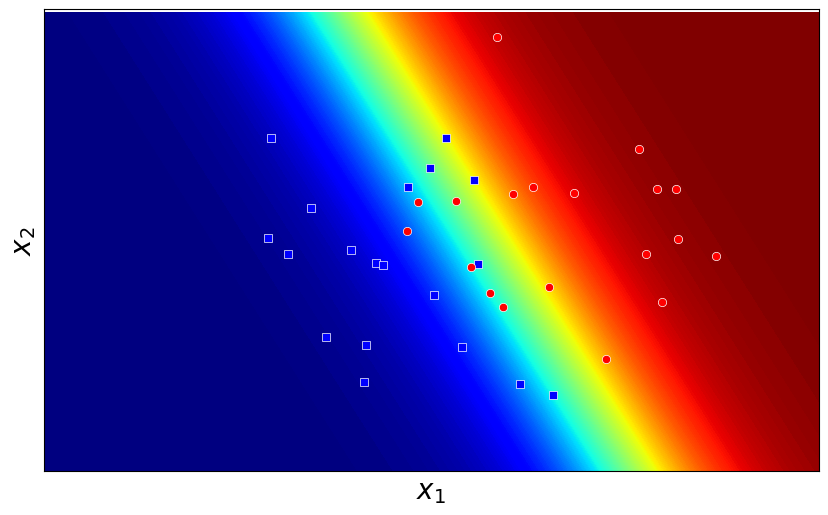

In [7]:
# Example code from lecture

x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
# Adjust plot space and point size
plt.figure(figsize=(10, 6))  # Increase figure size

# Plot contour of probability
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')

# Plot the data points with smaller size and white borders for visibility
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize=6, alpha=1, markeredgewidth=0.5, markeredgecolor='white')  # Blue squares with white border
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize=6, alpha=1, markeredgewidth=0.5, markeredgecolor='white')  # Red circles with white border

# Set axis limits
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# Hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# Set labels
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

# Save the figure with tight layout and high DPI
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi=100)

# Display the plot
plt.show()

Accuracy: 0.75
Confusion Matrix:
[[3 2]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.60      1.00      0.75         3

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



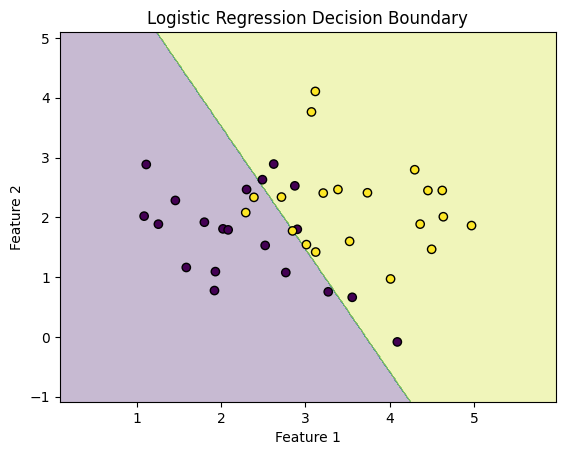

In [8]:
# Scikit-learn Logistic Regression implementation

# Create labels
y1 = np.zeros(N)
y2 = np.ones(N)

# Combine the datasets
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(log_reg, X, y)